#  Predicting California Housing Prices

**Project Objective:** In this project I want to practice my data science / machine learning skills on a regression problem using various tools such as Pandas, NumPy, Matplotlib, and Scikit-Learn. 

**Project Goal:** This will be a successful project if I am able to go through and clearly explain the steps of a typical machine learning pipeline that will be applied to the dataset. 

I a going to follow this machine learning pipeline:

Preparation:

1. Problem definition
2. Data Overview
3. Evaluation Grading
4. Features List

Data Manipulation & Modelling

1. Preparing the Tools
2. Data Exploration
3. Modelling
4. Hyperparameter tuning
5. Evalualting
6. Feature Importance

Summary

# Preparation

## 1. Problem Definition:

> Given certain parameters, can we predict the price of a house in California?

## 2. Data Overview:

This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

## 3. Evaluation Grading

> If the model has an accuracy score of **greatar then 80%** I will consider this is a successful project. Typically I would aim for a higher score, but since my project is focused on the process more then the results I will accept a >80% score.

## 4. Feature List

**Data Dictionary**

1. longitude: The longitude of the area
2. latitude: The latitude of the area
3. housing_median_age: The average age of a home in the area
4. total_rooms: The average number of rooms per home in that area
5. total_bedrooms: The average number of bedrooms per home in that area
6. population: The population of the given area
7. households: The total number of homes in that area
8. median_income: The average income per household in that area
9. median_house_value: The average value per home in that area
10. ocean_proximity: How close the area is to the ocean (<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND)

**Everything above is just preparation to actually begin the data science and machine learning portion of the project**

# Data Manipulation & Modelling

## 1. Preparing the Tools

I am going to import Pandas, NumPy, and Matplotlib for data manipulation.

I am going to import Scikit-Learn and a few select models for evaluating and modelling.

In [1]:
# For Data Manipulation and Exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Choosen Models from Scikit-Learn
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

# 2. Data Exploration

Here I will be loading the data into a Pandas DataFrame, exploring it's content to build understanding, dealing with missing values, and getting it ready for modlling.

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()
# Here we see that the coolumn of total_bedrooms is missing data so we will deal with that first

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# In order to substitute the missing values we will use the mean of the entire dataset, the dataset is pretty large so it should work for now.
round(df["total_bedrooms"].mean())

538

In [7]:
# Filling missing values with the columns mean
df["total_bedrooms"].fillna(round(df["total_bedrooms"].mean()), inplace = True) 

In [8]:
# Check for missing values again
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

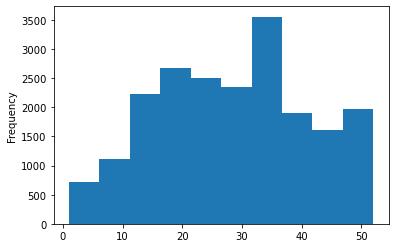

In [9]:
df.housing_median_age.plot.hist();

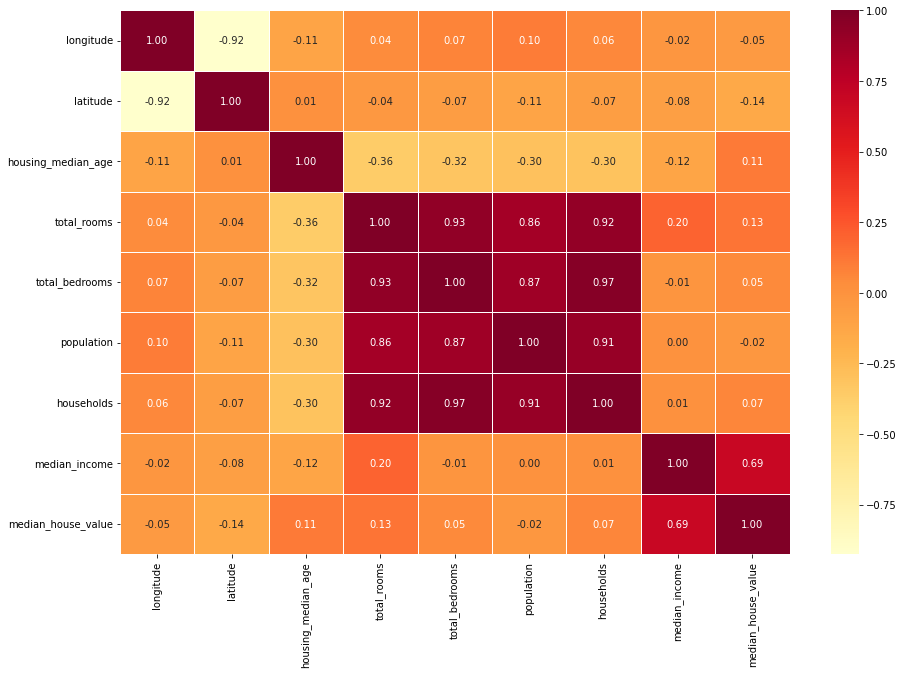

In [10]:
# We are going to create a correlation matrix (look below for explanation) 
# to see how each of the parameters relate to each other.
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlOrRd");

**We also need to take the fact that the entire dataset needs to be filled with numbers so we need to manipulate the ocean_proximity column**

In [11]:
df_ocean_proximity = pd.get_dummies(df[["ocean_proximity"]])
df_ocean_proximity
# Splitting the ocean_proximity column into 4 seperate columns with numeric indications

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [12]:
import warnings
warnings.filterwarnings('ignore')
df = df.drop('ocean_proximity', 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [13]:
housing_df = pd.concat([df, df_ocean_proximity], axis=1, join="inner")
housing_df
# This is the final dataframe we will use with the original dataset and the ocean_proximity 
# numeric dataframe merged together and ocmbined into one datadrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


**Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning mode.** 

# 3. Modelling

In [14]:
# Put models in a dictionary
models = {"Random Forest Regressor": RandomForestRegressor(),
          "Ridge": Ridge(),
          "Bagging": BaggingClassifier(),
          "K-Nearest": KNeighborsClassifier(),
          "SGD": SGDClassifier()}

X = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different differnt Sckikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no lables)
    y_train: training labels
    y_test: test labels
    '''
    # Set random seed
    np.random.seed(0)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Random Forest Regressor': 0.8284789264725168,
 'Ridge': 0.6525299736627037,
 'Bagging': 0.03827519379844961,
 'K-Nearest': 0.02131782945736434,
 'SGD': 0.00024224806201550387}

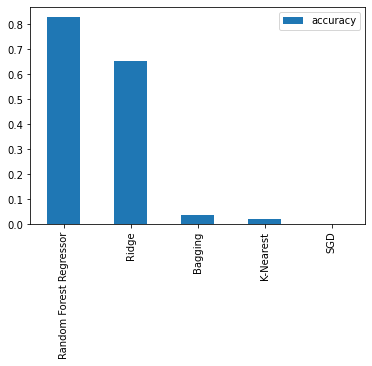

In [18]:
# Although it's pretty obvious at the moment, it would be helpful to create a quick graph comparing the models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# 4. Hyperparameter Tuning

I will tune the Random Forest models using RandomizedSearchCV to make the process much easier.

**Reading documentation what each of these models actually do**

In [23]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 7.13 s, sys: 37 ms, total: 7.17 s
Wall time: 7.32 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [24]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 8,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [27]:
ideal_model = RandomForestRegressor(n_estimators=70,
                                    min_samples_leaf=17,
                                    min_samples_split=8,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=10000,
                                    max_depth=None,
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)
# Test the ideal model
ideal_model.score(X_test, y_test)

0.7964515095582855

**This score is slightly lower, further hyperparameter tuning can definetly help with increasing accuracy, but for now we will take the original 82.8%**

# 5. Evaluating

Now I will display some other evaluation metrics (besides accuracy which is the default)

and some of these we will calculate using `cross-val_score()`

In [41]:
# Make predictions with tuned model
y_preds = rs_model.predict(X_test)

In [42]:
y_preds

array([307876.88722139, 188537.14832451,  71902.23581925, ...,
       196716.7190832 , 154622.36477239, 131254.69371727])

In [43]:
y_test

15981    374200.0
13286    166400.0
2384      80000.0
6917     296700.0
14784    144400.0
           ...   
18627    331500.0
11864     77100.0
19319    162100.0
7206     125000.0
251       80600.0
Name: median_house_value, Length: 4128, dtype: float64

In [44]:
# Split data into training and validation
df_val = housing_df[housing_df.latitude == 37.82]
df_train = housing_df[housing_df.latitude != 37.82]

len(df_val), len(df_train)

(49, 20591)

In [45]:
# Split data into X and y
X_train, y_train = df_train.drop("median_house_value", axis=1), df_train.median_house_value
X_valid, y_valid = df_val.drop("median_house_value", axis=1), df_val.median_house_value

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((20591, 13), (20591,), (49, 13), (49,))

In [46]:
# Create evaluation function (the competition uesed RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculated root mean squared error between predicitions and true lables.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [47]:
show_scores(rs_model)

{'Training MAE': 34338.80077833635,
 'Valid MAE': 42881.65562384364,
 'Training RMSLE': 0.24206431074469614,
 'Valid RMSLE': 0.3590946520269295,
 'Training R^2': 0.8083837738430824,
 'Valid R^2': 0.8187780596983232}

# 6. Feature Importance

Feature importance seeks to figgure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice)

In [48]:
len(ideal_model.feature_importances_)

13

In [49]:
# Helper Function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

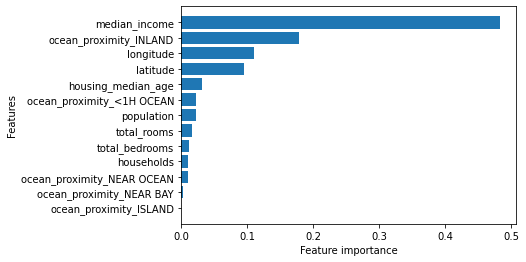

In [50]:
plot_features(X_train.columns, ideal_model.feature_importances_)

Feature importance gives us a lot of insight into which parameters are useful, harmful, or useless to the model. In order to improve the model the harmful parameters can be removed from the dataset.

**Positive feature importance:** A parameter that makes the loss go down. This means that the model is working with the parameter well.

**Negative feature importance:** A parameter that makes the loss go up. This means that the model is not working with the parameter well.

## Summary

In summary, we used a `RandomForestRegressor()` model to predict a california housing regression problem. We reached a peak accuracy score of `82.8%`.  

In order to imporve the model we can... use a larger dataset, hypertune further, remove harmful parameters.